In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/Users/maksimkarvanen/Projects/face_mask_cv/mask'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/Users/maksimkarvanen/Projects/face_mask_cv/mask/.DS_Store
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss702.png
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss716.png
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss299.png
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss266.png
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss500.png
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss514.png
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss272.png
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss528.png
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss312.png
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss474.png
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss460.png
/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss306.png
/Users/maksimkarvanen/Project

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps
!pip install ultralytics
from ultralytics import YOLO

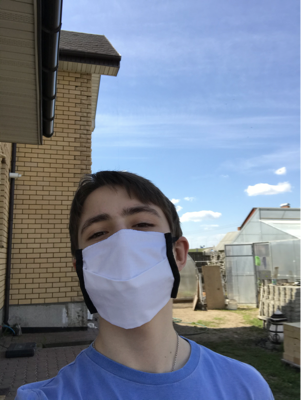

In [3]:
Image.open("/Users/maksimkarvanen/Projects/face_mask_cv/mask/images/maksssksksss333.png")

In [4]:
def xml_to_yolo_bbox(bbox, w, h):
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h

    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h

    return [x_center, y_center, width, height]

def yolo_to_xml_bbox(bbox, w, h):
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2

    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)

    return [xmin, ymin, xmax, ymax]

In [5]:
classes = []

input_dir = '/Users/maksimkarvanen/Projects/face_mask_cv/mask/annotations'
output_dir = '/Users/maksimkarvanen/Projects/face_mask_cv/work/labels'
image_dir = '/Users/maksimkarvanen/Projects/face_mask_cv/mask/images'

if not os.path.exists(output_dir):
    os.mkdir(output_dir)

files = glob.glob(os.path.join(input_dir, '*.xml'))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f'{filename}.png')):
        print(f'{filename} image does not exist')
        continue

    result = []

    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find('size').find('width').text)
    height = int(root.find('size').find('height').text)

    for obj in root.findall('object'):
        label = obj.find('name').text

        if label not in classes:
            classes.append(label)

        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find('bndbox')]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)

        bbox_string =  ' '.join([str(x) for x in yolo_bbox])
        result.append(f'{index} {bbox_string}')

    if result:
        with open(os.path.join(output_dir, f'{filename}.txt'), 'w', encoding = 'utf-8') as f:
            f.write('\n'.join(result))

with open(f'{output_dir}/classes.txt', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(classes))

In [6]:
with open(f'{output_dir}/classes.txt') as f:
    contents = f.read()
    print(contents)

["without_mask", "mask_weared_incorrect", "with_mask"]


In [7]:
annotation_count = len(os.listdir("/Users/maksimkarvanen/Projects/face_mask_cv/mask/annotations"))
labels_count = len(os.listdir("/Users/maksimkarvanen/Projects/face_mask_cv/work/labels"))
print(f"Annotation Counts: {annotation_count}")
print(f"Lables Counts: {labels_count}")

Annotation Counts: 853
Lables Counts: 854


In [8]:
if not os.path.isfile("/Users/maksimkarvanen/Projects/face_mask_cv/work/data"):
    os.mkdir('/Users/maksimkarvanen/Projects/face_mask_cv/work/data')
    os.mkdir('/Users/maksimkarvanen/Projects/face_mask_cv/work/data/train')
    os.mkdir('/Users/maksimkarvanen/Projects/face_mask_cv/work/data/val')
    os.mkdir('/Users/maksimkarvanen/Projects/face_mask_cv/work/data/test')
    os.mkdir('/Users/maksimkarvanen/Projects/face_mask_cv/work/data/train/images')
    os.mkdir('/Users/maksimkarvanen/Projects/face_mask_cv/work/data/train/labels')
    os.mkdir('/Users/maksimkarvanen/Projects/face_mask_cv/work/data/test/images')
    os.mkdir('/Users/maksimkarvanen/Projects/face_mask_cv/work/data/test/labels')
    os.mkdir('/Users/maksimkarvanen/Projects/face_mask_cv/work/data/val/images')
    os.mkdir('/Users/maksimkarvanen/Projects/face_mask_cv/work/data/val/labels')

In [9]:
metarial = []
for i in os.listdir("/Users/maksimkarvanen/Projects/face_mask_cv/mask/images"):
    str = i[:-4]
    metarial.append(str)

In [10]:
metarial[:10]

['maksssksksss702',
 'maksssksksss716',
 'maksssksksss299',
 'maksssksksss266',
 'maksssksksss500',
 'maksssksksss514',
 'maksssksksss272',
 'maksssksksss528',
 'maksssksksss312',
 'maksssksksss474']

In [11]:
print("Sum of image: ", len(metarial))
train_size = int(len(metarial) * 0.7)
test_size = int(len(metarial) * 0.15)
val_size = int(len(metarial) * 0.15)
print("Sum of the train size: ", train_size)
print("Sum of the test size: ", test_size)
print("Sum of the val size: ", val_size)

Sum of image:  853
Sum of the train size:  597
Sum of the test size:  127
Sum of the val size:  127


In [14]:
def preparinbdata(main_txt_file, main_img_file, train_size, test_size, val_size):
    for i in range(0, train_size):
        source_txt = main_txt_file + "/" + metarial[i] + ".txt"
        source_img = main_img_file + "/" + metarial[i] + ".png"
        
        mstring = metarial[i]
        train_destination_txt = "/Users/maksimkarvanen/Projects/face_mask_cv/work/data/train/labels" + "/" + metarial[i] + ".txt"
        train_destination_png = "/Users/maksimkarvanen/Projects/face_mask_cv/work/data/train/images" + "/" + metarial[i] + ".png"
        
        shutil.copy(source_txt, train_destination_txt)
        shutil.copy(source_img, train_destination_png)
        
    for l in range(train_size , train_size + test_size):

        source_txt = main_txt_file + "/" + metarial[l] + ".txt"
        source_img = main_img_file + "/" + metarial[l] + ".png"

        mstring = metarial[l]
        test_destination_txt = "/Users/maksimkarvanen/Projects/face_mask_cv/work/data/test/labels" + "/" + metarial[l] + ".txt"
        test_destination_png = "/Users/maksimkarvanen/Projects/face_mask_cv/work/data/test/images" + "/" + metarial[l] + ".png"

        shutil.copy(source_txt, test_destination_txt)
        shutil.copy(source_img, test_destination_png)

    for n in range(train_size + test_size , train_size + test_size + val_size):

        source_txt = main_txt_file + "/" + metarial[n] + ".txt"
        source_img = main_img_file + "/" + metarial[n] + ".png"

        mstring = metarial[n]
        val_destination_txt = "/Users/maksimkarvanen/Projects/face_mask_cv/work/data/val/labels" + "/" + metarial[n] + ".txt"
        val_destination_png = "/Users/maksimkarvanen/Projects/face_mask_cv/work/data/val/images" + "/" + metarial[n] + ".png"

        shutil.copy(source_txt, val_destination_txt)
        shutil.copy(source_img, val_destination_png)

In [15]:
preparinbdata(main_txt_file = "/Users/maksimkarvanen/Projects/face_mask_cv/work/labels", 
                main_img_file = "/Users/maksimkarvanen/Projects/face_mask_cv/mask/images", 
                train_size = train_size, 
                test_size = test_size, 
                val_size = val_size)

In [16]:
yaml_text = """train: /Users/maksimkarvanen/Projects/face_mask_cv/work/data/train/images
val: /Users/maksimkarvanen/Projects/face_mask_cv/work/data/val/images

nc: 3
names: ["with_mask", "mask_weared_incorrect", "without_mask"]"""

with open("/Users/maksimkarvanen/Projects/face_mask_cv/work/data/data.yaml", 'w') as file:
    file.write(yaml_text)

In [17]:
with open("/Users/maksimkarvanen/Projects/face_mask_cv/work/data/data.yaml") as f:
    contents = f.read()
    print(contents)

train: /Users/maksimkarvanen/Projects/face_mask_cv/work/data/train/images
val: /Users/maksimkarvanen/Projects/face_mask_cv/work/data/val/images

nc: 3
names: ["with_mask", "mask_weared_incorrect", "without_mask"]
